In [ ]:
%pip install pandas

In [2]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/IQTLabs/software-supply-chain-compromises/master/software_supply_chain_attacks.csv"
df = pd.read_csv(url)

In [3]:
# Filter open-source attacks based on technology
open_source_attacks = df[df["technology"].isin(["npm", "PyPI", "Docker Hub", "NuGet", "RubyGems", "Packagist"])]

# Count open-source attacks
num_open_source_attacks = open_source_attacks.shape[0]
total_attacks = df.shape[0]

# Calculate percentage of open-source attacks
percentage_open_source = round(num_open_source_attacks / total_attacks * 100, 2)

# Print results
print(f"Number of open-source attacks: {num_open_source_attacks}")
print(f"Percentage of attacks from open-source packages: {percentage_open_source}%")

Number of open-source attacks: 41
Percentage of attacks from open-source packages: 22.4%



Top 5 attack categories for open-source packages:
attack_minor_category
Typosquatting                    17
Malicious Package                15
Dependency Compromise             4
Source Code System Compromise     2
Software Registry Attacks         2
Name: count, dtype: int64


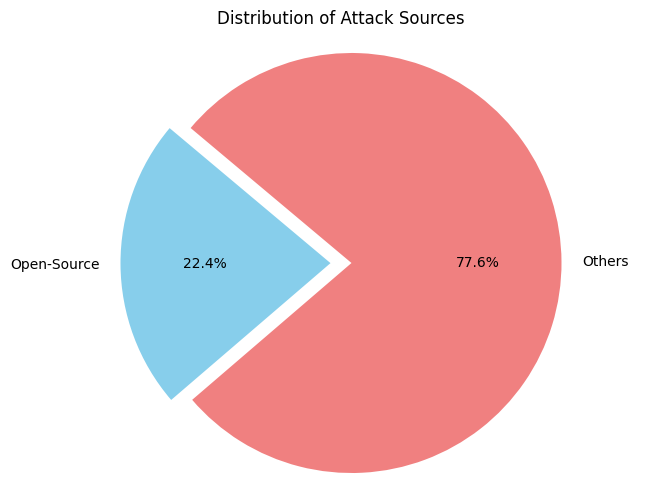

In [4]:
# Analyze attack categories 
from collections import Counter

attack_categories = open_source_attacks["attack_minor_category"].value_counts()
print(f"\nTop 5 attack categories for open-source packages:")
print(attack_categories.head())

# Visualize the results 
import matplotlib.pyplot as plt

labels = ["Open-Source", "Others"]
sizes = [num_open_source_attacks, total_attacks - num_open_source_attacks]
colors = ["skyblue", "lightcoral"]

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=(0.1, 0), labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Attack Sources")
plt.axis("equal")
plt.show()


This code will generate bar plots for the impact, attack vectors, and targets of the attacks, and a line plot for the number of attacks over time. 

In [ ]:
%pip install pandas
%pip install matplotlib

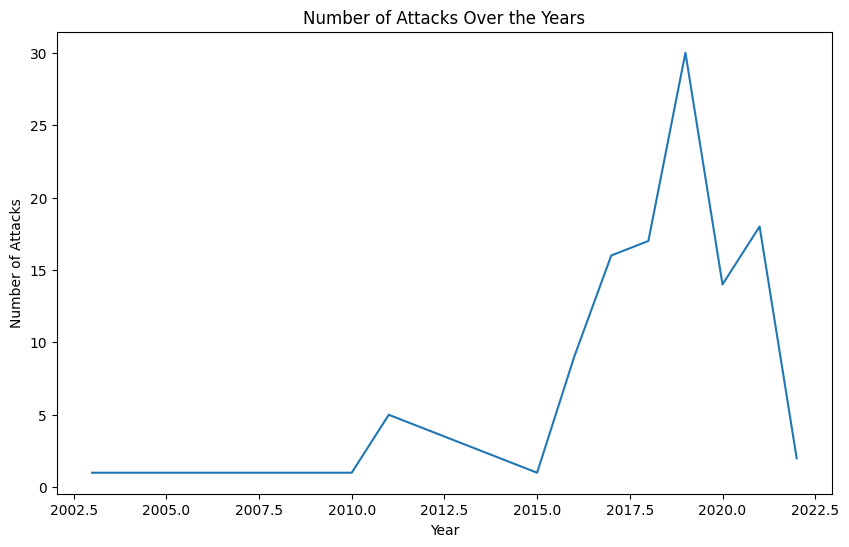

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
url = "https://raw.githubusercontent.com/IQTLabs/software-supply-chain-compromises/master/software_supply_chain_attacks.csv"
data = pd.read_csv(url)

# Convert the 'detection_date' column to datetime format, errors='coerce' will convert invalid dates to NaT
data['detection_date'] = pd.to_datetime(data['detection_date'], errors='coerce')

# Drop the rows where 'detection_date' is NaT (Not a Time)
data = data.dropna(subset=['detection_date'])

# Trend Analysis
data['year'] = data['detection_date'].dt.year
trend = data['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
trend.plot(kind='line')
plt.title('Number of Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()


Linear Regression To Estimate attack on 2023

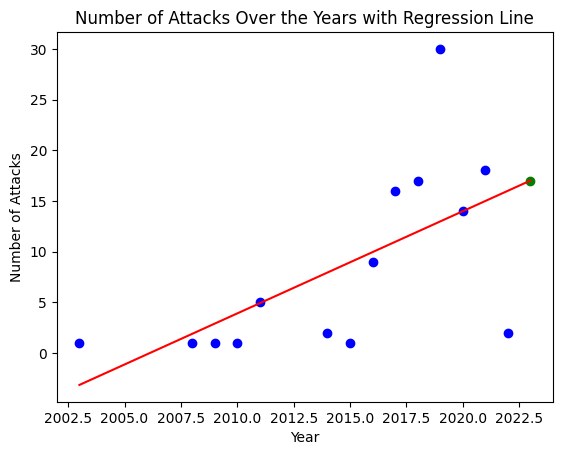

Estimated number of attacks in 2023: 17.00157756354065


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the data
url = "https://raw.githubusercontent.com/IQTLabs/software-supply-chain-compromises/master/software_supply_chain_attacks.csv"
data = pd.read_csv(url)

# Convert the 'detection_date' column to datetime format, errors='coerce' will convert invalid dates to NaT
data['detection_date'] = pd.to_datetime(data['detection_date'], errors='coerce')

# Drop the rows where 'detection_date' is NaT (Not a Time)
data = data.dropna(subset=['detection_date'])

# Trend Analysis
data['year'] = data['detection_date'].dt.year
trend = data['year'].value_counts().sort_index()

# Prepare the data for the model
X = trend.index.values.reshape(-1, 1)  # Years (features)
y = trend.values  # Number of attacks (target)

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Generate a sequence of years from the earliest year in the data to 2023
X_seq = np.linspace(X.min(), 2023, num=500).reshape(-1, 1)

# Predict the number of attacks for each year in the sequence
y_seq = model.predict(X_seq)

# Predict the number of attacks in 2023
X_2023 = np.array([[2023]])
predicted_attacks = model.predict(X_2023)

# Plot the actual data
plt.scatter(X, y, color='blue')
# Plot the regression line
plt.plot(X_seq, y_seq, color='red')
# Plot the predicted value for 2023
plt.scatter(X_2023, predicted_attacks, color='green')

plt.title('Number of Attacks Over the Years with Regression Line')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

print(f"Estimated number of attacks in 2023: {predicted_attacks[0]}")

In [ ]:
%pip install networkx

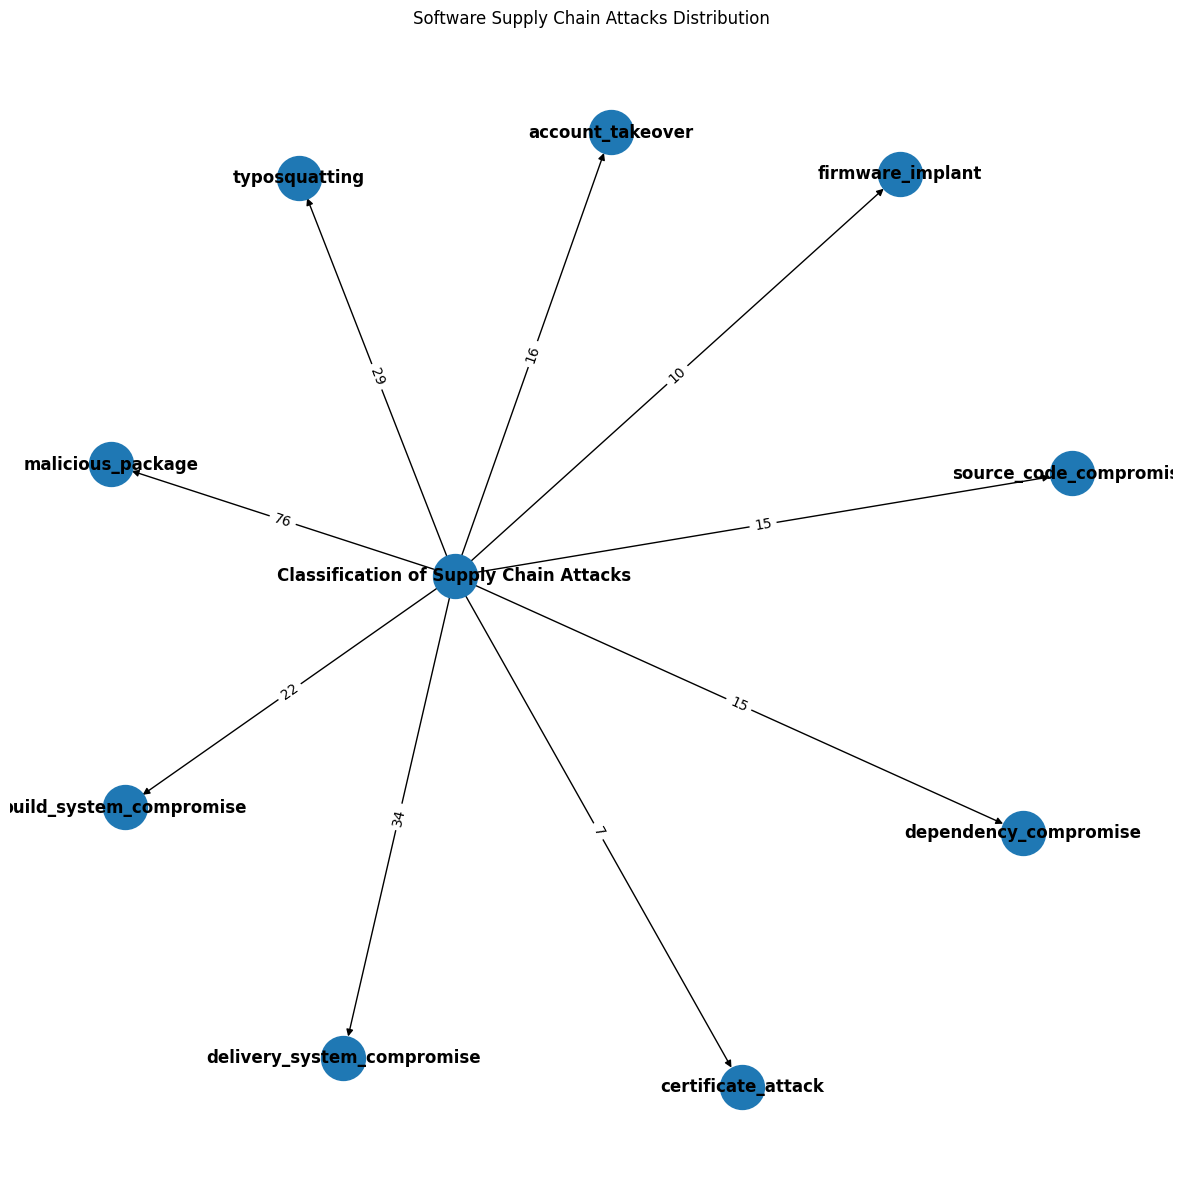

In [28]:

import networkx as nx

# Define columns that indicate attack types
attack_columns = [
    "typosquatting",
    "malicious_package",
    "dependency_compromise",
    "account_takeover",
    "delivery_system_compromise",
    "certificate_attack",
    "firmware_implant",
    "build_system_compromise",
    "source_code_compromise",
]

for column in attack_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Count the occurrences of "Yes" for each attack type
attack_counts = data[attack_columns].sum()

# Define root node and child nodes
root_node = "Classification of Supply Chain Attacks"
child_nodes = list(attack_counts.index)

# Setup the graph
G = nx.DiGraph()
G.add_node(root_node)

# Add child nodes and edges with counts
for child, weight in attack_counts.items():
    G.add_node(child)
    G.add_edge(root_node, child, weight=weight)

# Set node positions
pos = nx.spring_layout(G)

# Draw the graph
plt.figure(figsize=(15, 15))
nx.draw_networkx(G, pos, with_labels=True, font_weight="bold", node_size=1000)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_size=10)
plt.title("Software Supply Chain Attacks Distribution")
plt.axis("off")

# Show the plot
plt.show()

Hypothesis Test: Now, we would like to consider the dataset of Incribo's synthetic cyber dataset which has a clear demonstration of the severity level of a malicious codebase and anomaly scores!

Since the data is not normaly distributed, we will perform Mann-Whitney U test.
Ref: https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks/data


In [5]:
from scipy.stats import mannwhitneyu
import pandas as pd

cyber_data = pd.read_csv('./dataset/cybersecurity_attacks.csv')
# Separate the data into two groups based on Severity Level
high_severity = cyber_data[cyber_data['Severity Level'] == 'High']['Anomaly Scores']
low_severity = cyber_data[cyber_data['Severity Level'] == 'Low']['Anomaly Scores']

# Perform the Mann-Whitney U test
stat, p = mannwhitneyu(high_severity, low_severity)

print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=88320195.000, p=0.857


The results of Mann-Whitney U test indicate that the test statistic is approximately 88320195 and the p-value is 0.857.

The p-value is much greater than the typical threshold of 0.05 which suggests that there is not a statistically significant difference in the distribution of 'Anomaly Scores' between 'High' and 'Low' severity levels.

In simpler terms, the test suggests that the 'Anomaly Scores' do not significantly differ between 'High' and 'Low' severity levels in the cybersecurity dataset.

In [ ]:
%pip install nbconvert # For PDF Convert